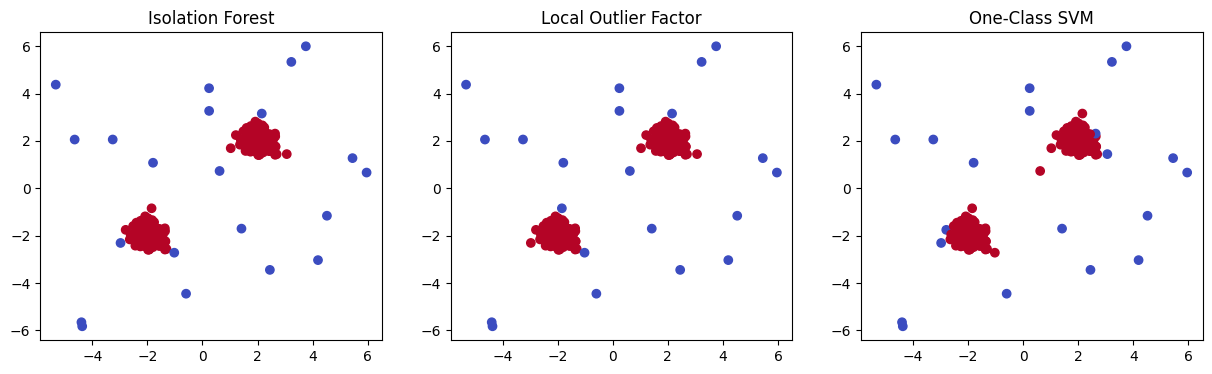

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# ----- Synthetic data -----
rng = np.random.RandomState(42)
X_inliers = 0.3 * rng.randn(200, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_outliers = rng.uniform(low=-6, high=6, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

# ----- Models -----
iso = IsolationForest(contamination=0.05, random_state=42)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
svm = OneClassSVM(nu=0.05, kernel="rbf", gamma=0.1)

# ----- Predictions -----
y_iso = iso.fit_predict(X)
y_lof = lof.fit_predict(X)
y_svm = svm.fit_predict(X)

# ----- Visualization -----
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.scatter(X[:,0], X[:,1], c=y_iso, cmap='coolwarm')
plt.title("Isolation Forest")

plt.subplot(1,3,2)
plt.scatter(X[:,0], X[:,1], c=y_lof, cmap='coolwarm')
plt.title("Local Outlier Factor")

plt.subplot(1,3,3)
plt.scatter(X[:,0], X[:,1], c=y_svm, cmap='coolwarm')
plt.title("One-Class SVM")

plt.show()
